#### Importing packages

In [8]:
import random
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
import re
from pulp import *

import warnings
warnings.filterwarnings("ignore")

#### Load data

In [2]:
budget = pd.read_excel("Advertising Budget.xlsx")

budget.set_index(["Marketing Channels"], inplace=True)

budget

,Return on Investment
Marketing Channels,
Television,0.08
Google,0.12
Twitter,0.07
Facebook,0.11
YouTube,0.04


#### Decision variables

In [3]:
channels = budget.index.to_list()

var_dict = LpVariable.dicts(name="Budget", indexs=channels, lowBound=0, cat="Continuous")

#### Objective function

In [4]:
model = LpProblem("Marketing Budget Allocation", LpMaximize)

model += lpSum([budget.loc[cn, "Return on Investment"]*var_dict[cn] for cn in channels])

#### Constraints

In [5]:
# Constraint_1: Total budget is $100,000
model += lpSum([var_dict[cn] for cn in channels]) <= 100000

# Constraint_2: Television budget cannot exceed 58% of total budget
model += var_dict["Television"] <= 0.58 * lpSum([var_dict[cn] for cn in channels])

# Constraint_3: Sum of Google an television advertisement cannot exceed 80% of whole budget
model += var_dict["Television"] + var_dict["Google"] <= 0.80 * lpSum([var_dict[cn] for cn in channels])

# Constraint_4: Sum of Twitter, Google and YouTube cannot exceed 30% of whole budget
model += var_dict["Twitter"] + var_dict["Google"] + var_dict["YouTube"] <= 0.30 * lpSum([var_dict[cn] for cn in channels])

# Constraint_5: Facebook budget cannot exceed $10,000
model += var_dict["Facebook"] <= 10000

#### Solve for optimal solution

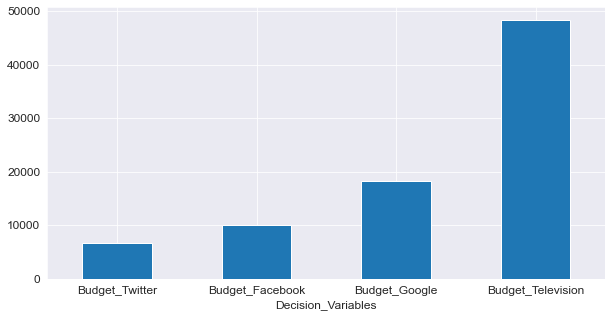

In [15]:
model.solve()

optimal_solution = pd.DataFrame([(v.name, round(v.varValue, 2)) for v in model.variables() if v.varValue!=0], 
                                columns=["Decision_Variables", "Optimized Budget"]).set_index(["Decision_Variables"])

optimal_solution.sort_values(by=["Optimized Budget"], inplace=True)


sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (10, 5) 
plt.rcParams["font.size"] = 12 


optimal_solution["Optimized Budget"].plot(kind="bar")

plt.xticks(rotation=0)


plt.show()